In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import datetime
from scipy.stats import ttest_ind

In [12]:
#Define file path and load the file
file_path = "Resources/games-features.csv"
file_data = pd.read_csv(file_path)

#Get the Columns needed for the analysis
games_data_df = pd.DataFrame(file_data[["ResponseName", "ReleaseDate", "DemoCount", "Metacritic", "RecommendationCount", "ScreenshotCount", "SteamSpyOwners", "SteamSpyPlayersEstimate", "ControllerSupport", "IsFree", "FreeVerAvail", "PurchaseAvail", "SubscriptionAvail", "PlatformWindows", "PlatformLinux", "PlatformMac", "GenreIsNonGame", "GenreIsIndie", "GenreIsAction", "GenreIsAdventure",
"GenreIsCasual", "GenreIsStrategy", "GenreIsRPG", "GenreIsSimulation", "GenreIsEarlyAccess", "GenreIsFreeToPlay", "GenreIsSports", "GenreIsRacing", "GenreIsMassivelyMultiplayer", "PriceInitial", "PriceFinal", "CategorySinglePlayer","CategoryMultiplayer"]])

games_data_df.head()

,ResponseName,ReleaseDate,DemoCount,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,IsFree,...,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,CategorySinglePlayer,CategoryMultiplayer
0,Counter-Strike,Nov 1 2000,0,88,68991,13,13033334,9140731,False,False,...,False,False,False,False,False,False,9.99,9.99,False,True
1,Team Fortress Classic,Apr 1 1999,0,0,2439,5,5399140,753627,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
2,Day of Defeat,May 1 2003,0,79,2319,5,7621102,1709740,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
3,Deathmatch Classic,Jun 1 2001,0,0,888,4,7498965,789676,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
4,Half-Life: Opposing Force,Nov 1 1999,0,0,2934,5,5399499,705741,False,False,...,False,False,False,False,False,False,4.99,4.99,True,True


In [13]:
#Remove the rows with garbage date values

games_data_df['ReleaseDate'] = pd.to_datetime(games_data_df['ReleaseDate'], errors='coerce')
games_data_df['ReleaseDate'].replace('', np.nan, inplace=True)

cleaned_data_df = games_data_df.dropna()

In [14]:
#Remove duplicate games
cleaned_data_df = cleaned_data_df.drop_duplicates(subset=['ResponseName'], keep='first')

In [15]:
cleaned_data_df = cleaned_data_df.rename(columns={"ResponseName": "GameName",
                                                  "Metacritic": "MetacriticRating"})

cleaned_data_df.to_csv("Resources/clean_data.csv")

cleaned_data_df.head()

,GameName,ReleaseDate,DemoCount,MetacriticRating,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,IsFree,...,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,CategorySinglePlayer,CategoryMultiplayer
0,Counter-Strike,2000-11-01,0,88,68991,13,13033334,9140731,False,False,...,False,False,False,False,False,False,9.99,9.99,False,True
1,Team Fortress Classic,1999-04-01,0,0,2439,5,5399140,753627,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
2,Day of Defeat,2003-05-01,0,79,2319,5,7621102,1709740,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
3,Deathmatch Classic,2001-06-01,0,0,888,4,7498965,789676,False,False,...,False,False,False,False,False,False,4.99,4.99,False,True
4,Half-Life: Opposing Force,1999-11-01,0,0,2934,5,5399499,705741,False,False,...,False,False,False,False,False,False,4.99,4.99,True,True


## Platforms and Marketing Analysis 

### (1) Which platform (Windows, Linux, Mac) has the highest player count on average?

Calculate the average player count for each platform and visualize the results using bar charts. The groupby function will help group the data by platform, and then calculate the mean player count for each group.

In [16]:
# Load cleaned dataset
file_path = "Resources/clean_data.csv"
cleaned_data_df = pd.read_csv(file_path)

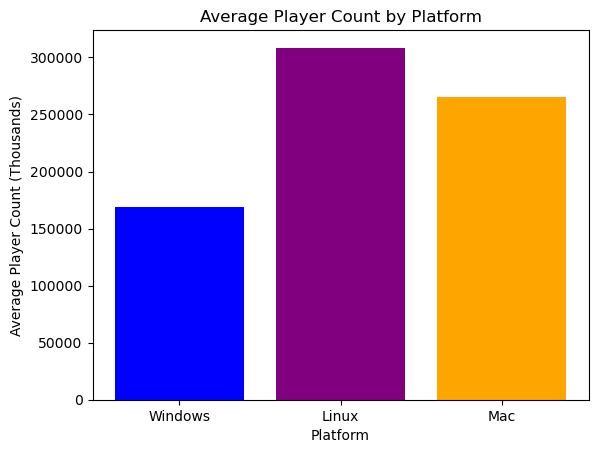

In [17]:
# Calculate the average player count for each platform
windows_player_counts = cleaned_data_df[cleaned_data_df['PlatformWindows'] == True]['SteamSpyOwners'].mean()
linux_player_counts = cleaned_data_df[cleaned_data_df['PlatformLinux'] == True]['SteamSpyOwners'].mean()
mac_player_counts = cleaned_data_df[cleaned_data_df['PlatformMac'] == True]['SteamSpyOwners'].mean()

# Create a bar chart to visualize the results
platforms = ['Windows', 'Linux', 'Mac']
average_player_counts = [windows_player_counts, linux_player_counts, mac_player_counts]
colors = ['blue', 'purple', 'orange']

plt.bar(platforms, average_player_counts, color=colors)
plt.title('Average Player Count by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Player Count (Thousands)')
plt.show()

### 1.1 Due to unexpected Linux results
To get a more comprehensive view, analyze the distribution of player counts for each platform, including metrics like median and standard deviation. To help understand not only the average player count but also the spread of player counts on each platform.

In [18]:
# Group the data by platform
platform_groups = cleaned_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux'])

# Calculate summary statistics for player counts within each group, including mean, median, and std
summary_statistics = platform_groups['SteamSpyOwners'].agg(['mean', 'median', 'std'])

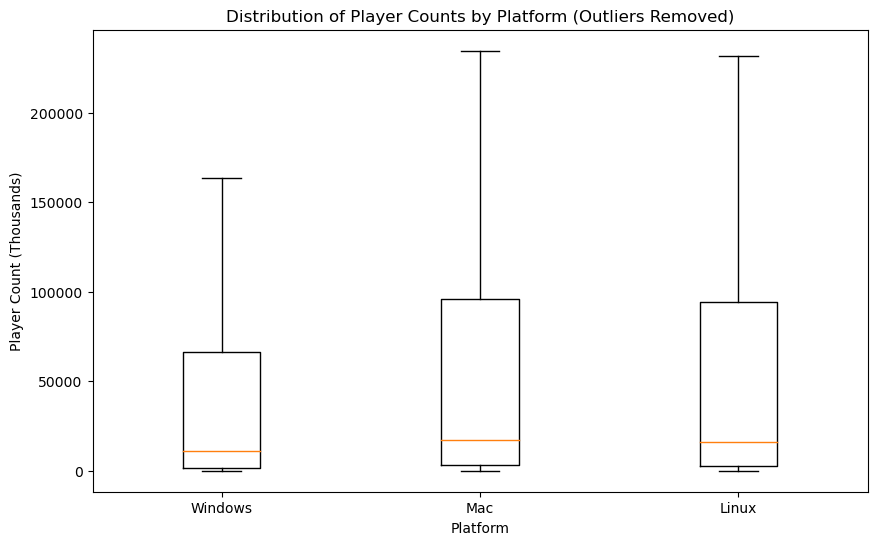

In [19]:
# Create a list to store the player counts for each platform
player_counts = [
    cleaned_data_df[cleaned_data_df['PlatformWindows']]['SteamSpyOwners'],
    cleaned_data_df[cleaned_data_df['PlatformMac']]['SteamSpyOwners'],
    cleaned_data_df[cleaned_data_df['PlatformLinux']]['SteamSpyOwners']
]

# Platform labels
platforms = ['Windows', 'Mac', 'Linux']

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(player_counts, labels=platforms, showfliers=False)
plt.title('Distribution of Player Counts by Platform (Outliers Removed)')
plt.xlabel('Platform')
plt.ylabel('Player Count (Thousands)')
plt.show()

### 1.2 Additionally
Explore whether there's a correlation between the number of games available on each platform and the mean player count. This could provide insights into how the availability of games affects player counts on different platforms. 

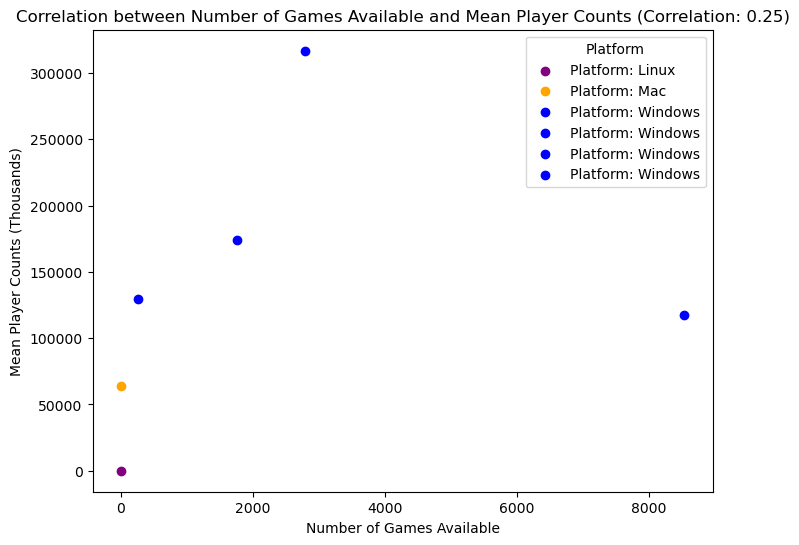

In [20]:
# Calculate the mean player count for each platform
mean_player_counts = games_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux'])['SteamSpyOwners'].mean()

# Calculate the number of games available on each platform
num_games_available = games_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux']).size()

# Create a DataFrame to store the results
correlation_df = pd.DataFrame({'MeanPlayerCounts': mean_player_counts, 'NumGamesAvailable': num_games_available})

# Calculate the correlation between the number of games available and mean player counts
correlation = correlation_df['MeanPlayerCounts'].corr(correlation_df['NumGamesAvailable'])

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))

# Separate the data for each platform combination
for platform, data in correlation_df.groupby(level=[0, 1, 2]):
    if platform == (True, False, False):
        color = 'blue'
        platform_label = 'Windows'
    elif platform == (False, True, False):
        color = 'orange'
        platform_label = 'Mac'
    elif platform == (False, False, True):
        color = 'purple'
        platform_label = 'Linux'
    
    plt.scatter(data['NumGamesAvailable'], data['MeanPlayerCounts'], label=f'Platform: {platform_label}', c=color)

plt.title(f'Correlation between Number of Games Available and Mean Player Counts (Correlation: {correlation:.2f})')
plt.xlabel('Number of Games Available')
plt.ylabel('Mean Player Counts (Thousands)')
plt.legend(title='Platform')
plt.show()

# Analysis 

- In summary, the revised analysis suggests that, on average, there is no substantial difference in player counts between Windows, Mac, and Linux platforms in the dataset due to limited data availability on players counts per platform. 
- Any initial differences observed may have been influenced by outliers in game counts or limited data availability for certain platforms. 
- When evaluating player counts, it's essential to consider the entire dataset and potential outliers to draw accurate conclusions. This dataset will not provide us with this information. 

### (2) Are games with broader platform availability more popular? 
Examine this by looking at the relationship between the number of platforms a game supports and mean rating, popularity, mean price, and price multiplied by the number of owners. 

In [21]:
# Create a new column "PlatformCount" to represent the count of platforms supported by each game
cleaned_data_df['PlatformCount'] = cleaned_data_df[['PlatformWindows', 'PlatformLinux', 'PlatformMac']].sum(axis=1)

# Group the data by "PlatformCount" and calculate the metrics
platform_groups = cleaned_data_df.groupby('PlatformCount').agg({
    'MetacriticRating': 'mean',
    'RecommendationCount': 'mean',
    'PriceFinal': 'mean',
    'SteamSpyOwners': 'sum',  # Sum of owners for each group
})

# Calculate "Price * #ofOwners" for each group
platform_groups['PriceOwnersProduct'] = platform_groups['PriceFinal'] * platform_groups['SteamSpyOwners']

# Reset the index to make "PlatformCount" a regular column
platform_groups.reset_index(inplace=True)

platform_groups

,PlatformCount,MetacriticRating,RecommendationCount,PriceFinal,SteamSpyOwners,PriceOwnersProduct
0,1,11.193110,704.188660,9.392132,934382270,8.775842e+09
1,2,13.649407,1018.566343,8.955243,305205590,2.733190e+09
2,3,16.289494,2738.563267,8.983923,847560622,7.614419e+09


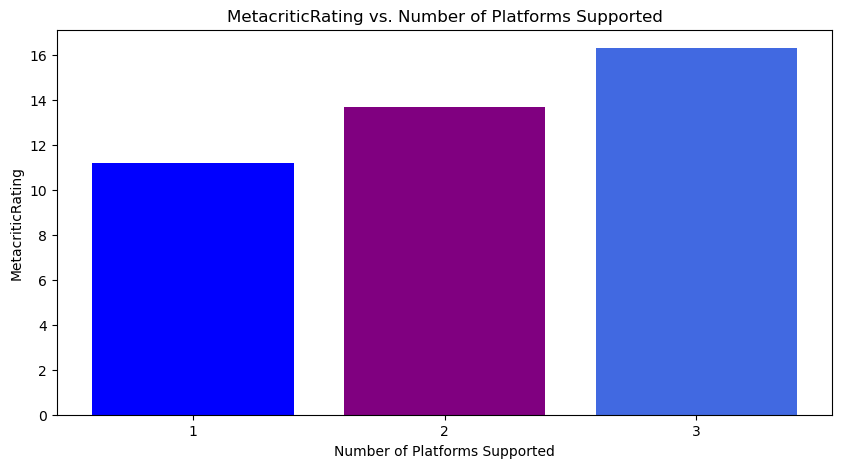

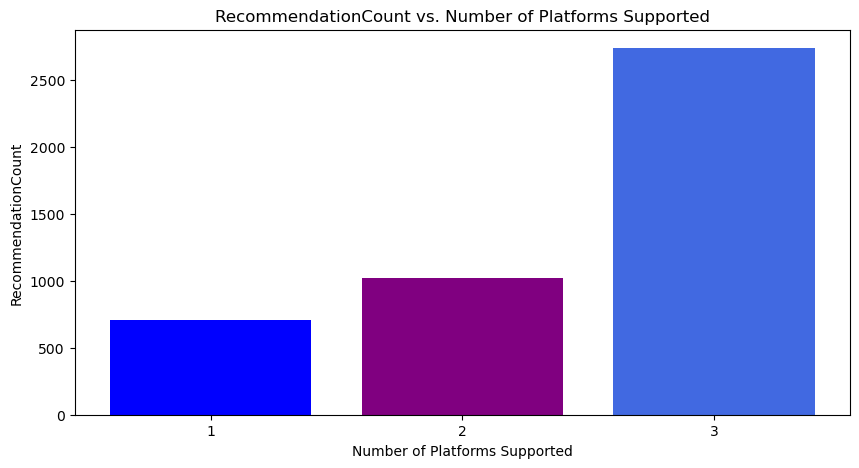

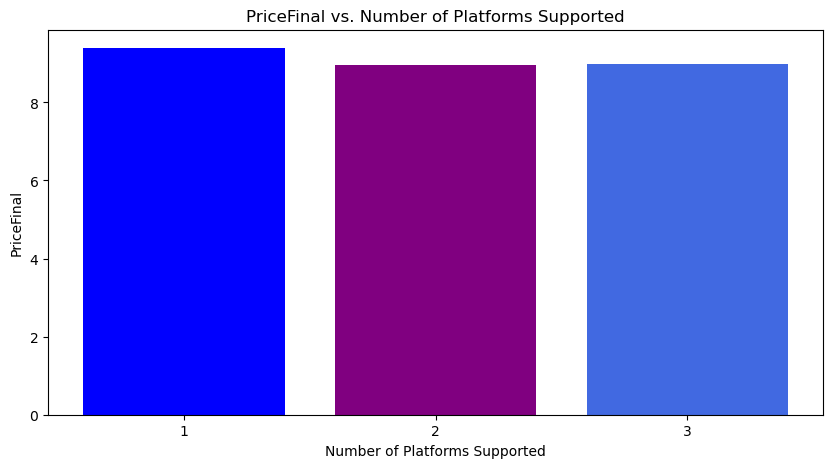

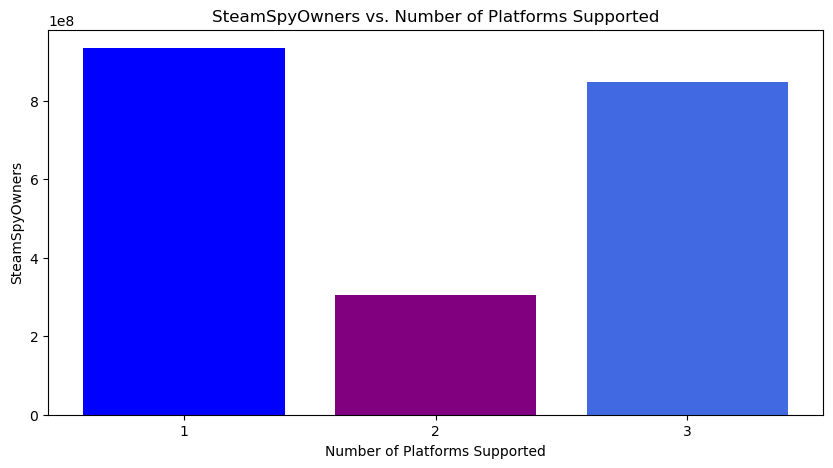

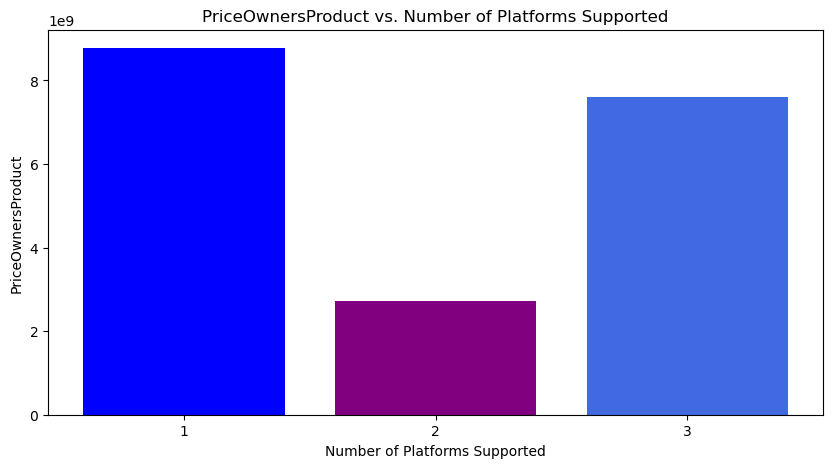

In [22]:
# Set custom colors for the bars
colors = ['blue', 'purple', 'royalblue']

# Loop through the metrics and create bar charts
metrics = ['MetacriticRating', 'RecommendationCount', 'PriceFinal', 'SteamSpyOwners', 'PriceOwnersProduct']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(platform_groups['PlatformCount'], platform_groups[metric], color=colors)
    plt.xlabel('Number of Platforms Supported')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Number of Platforms Supported')
    plt.xticks(range(1, 4))
    plt.show()

## Analysis

- Games supporting multiple platforms tend to have higher Metacritic ratings and higher popularity (RecommendationCount), suggesting that they may attract more players and receive better reviews.
- The price of games does not show a significant difference based on the number of supported platforms, indicating that pricing may not be a strong factor in platform availability. 
- In summary, games with broader platform support tend to attract more players and receive better reviews, which aligns with the idea that a wider availability of games can lead to increased player engagement and revenue.

### (3) Is there a relationship between Screenshots, Early Access Status and Demos and the number of players?
Create scatterplots to visualize the relationships between the number of screenshots or demos and the mean number of owners.

### 3.1 Screenshots

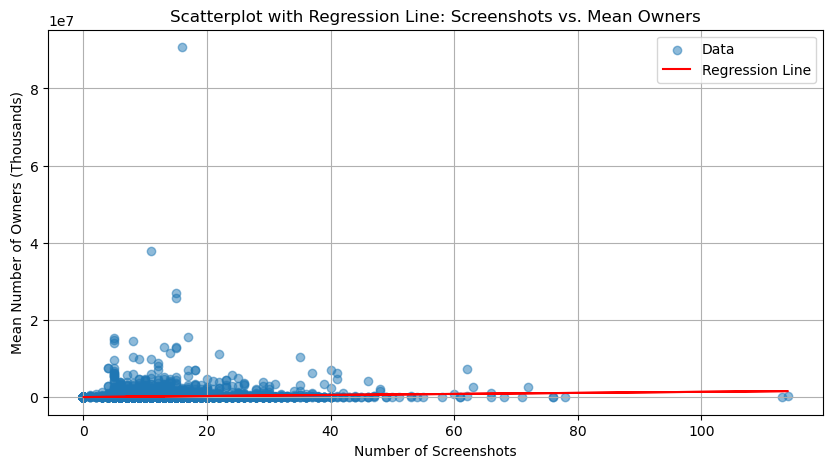

Regression Line Equation: y = 13569.82x + 39278.61
R-squared Value: 0.01


In [23]:
# Define the columns for the scatterplot
x = cleaned_data_df['ScreenshotCount']
y = cleaned_data_df['SteamSpyOwners']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Create the scatterplot with regression line
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.xlabel('Number of Screenshots')
plt.ylabel('Mean Number of Owners (Thousands)')
plt.title('Scatterplot with Regression Line: Screenshots vs. Mean Owners')
plt.grid(True)
plt.legend()
plt.show()

# Display regression statistics
print(f'Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}')
print(f'R-squared Value: {r_value**2:.2f}')

## Analysis 

- While there might be a slight positive correlation between the number of screenshots and the mean number of owners, it's very weak and not a reliable predictor of the number of owners.
- Other factors or variables likely play a more significant role in determining the number of owners for games.

### 3.2 Early Access Status

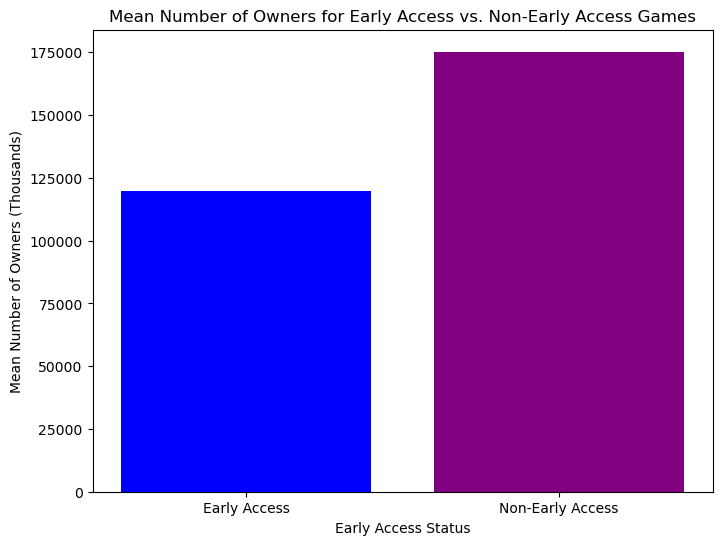

Summary Statistics for Early Access Games:
count    1.323000e+03
mean     1.198905e+05
std      9.754610e+05
min      0.000000e+00
25%      5.330000e+02
50%      2.870000e+03
75%      1.488600e+04
max      2.702529e+07
Name: SteamSpyOwners, dtype: float64

Summary Statistics for Non-Early Access Games:
count    1.100500e+04
mean     1.752416e+05
std      1.174462e+06
min      0.000000e+00
25%      1.614000e+03
50%      1.255400e+04
75%      7.407100e+04
max      9.068758e+07
Name: SteamSpyOwners, dtype: float64

T-Test Results:
T-statistic: -1.6472590643183633
P-value: 0.0995302984014389


In [24]:
# Create a bar chart to compare mean owners for early access vs. non-early access games
early_access_mean = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == True]['SteamSpyOwners'].mean()
non_early_access_mean = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == False]['SteamSpyOwners'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Early Access', 'Non-Early Access'], [early_access_mean, non_early_access_mean], color=['blue', 'purple'])
plt.xlabel('Early Access Status')
plt.ylabel('Mean Number of Owners (Thousands)')
plt.title('Mean Number of Owners for Early Access vs. Non-Early Access Games')
plt.show()

# Calculate summary statistics and perform a t-test
early_access_owners = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == True]['SteamSpyOwners']
non_early_access_owners = cleaned_data_df[cleaned_data_df['GenreIsEarlyAccess'] == False]['SteamSpyOwners']

early_access_summary = early_access_owners.describe()
non_early_access_summary = non_early_access_owners.describe()

t_stat, p_value = ttest_ind(early_access_owners, non_early_access_owners)

print("Summary Statistics for Early Access Games:")
print(early_access_summary)
print("\nSummary Statistics for Non-Early Access Games:")
print(non_early_access_summary)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

## Analysis 

- Based on the data and analysis performed, there is some evidence that non-early access games have a slightly higher mean number of owners compared to early access games. However, this difference is not strong enough to be considered statistically significant at the typical significance level of 0.05. 
- While there may be a small tendency for non-early access games to attract more players on average, the difference is not substantial enough to draw definitive conclusions. Other factors not considered in this analysis may also influence player counts. 

### 3.3 Demos

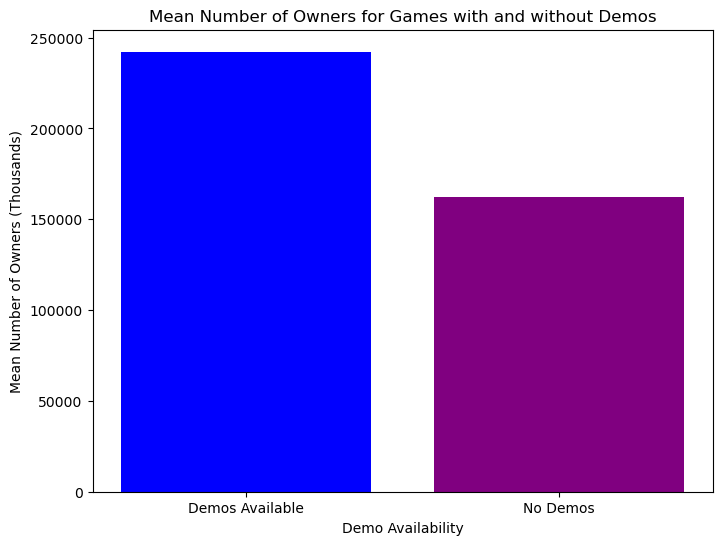

In [25]:
# Calculate the mean number of owners for games with and without demos
demo_mean = cleaned_data_df[cleaned_data_df['DemoCount'] == 1]['SteamSpyOwners'].mean()
no_demo_mean = cleaned_data_df[cleaned_data_df['DemoCount'] == 0]['SteamSpyOwners'].mean()

# Bar chart for Demos vs. Mean Owners
plt.figure(figsize=(8, 6))
plt.bar(['Demos Available', 'No Demos'], [demo_mean, no_demo_mean], color=['blue', 'purple'])
plt.xlabel('Demo Availability')
plt.ylabel('Mean Number of Owners (Thousands)')
plt.title('Mean Number of Owners for Games with and without Demos')
plt.show()

## Analysis

- Comparing these two groups, it appears that games with demos available tend to have a higher mean number of owners compared to games without demos. This suggests that there may be a positive relationship between the availability of demos and the number of players.
- It's important to note that this analysis does not establish causation. While there is a correlation between demos and higher player counts, other factors may also contribute to a game's popularity and player base. Further analysis and research would be needed to explore the causal factors behind this relationship.
- In summary, games with demos available tend to attract a larger number of players on average compared to games without demos, indicating a potential positive relationship between demo availability and player counts.

### (4) Which platform (Windows, Linux, Mac) has the highest game count on average?

Explore whether there's a correlation between the number of games available on each platform and any other relevant metrics, such as average ratings and recommendations.

In [26]:
# Count games per platform

# Group the data by platform (Windows, Mac, Linux)
game_counts_per_platform = cleaned_data_df.groupby(['PlatformWindows', 'PlatformMac', 'PlatformLinux']).size().reset_index(name='GameCount')

# Print the counts
print(game_counts_per_platform)

   PlatformWindows  PlatformMac  PlatformLinux  GameCount
0            False        False           True          1
1            False         True          False          1
2             True        False          False       7864
3             True        False           True        242
4             True         True          False       1612
5             True         True           True       2608


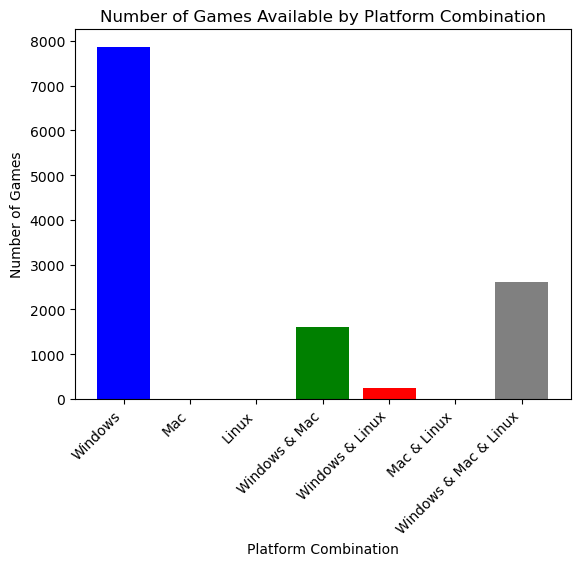

In [27]:
# Empty dictionary to store game counts for each platform combination
game_counts = {
    'Windows': 0,
    'Mac': 0,
    'Linux': 0,
    'Windows & Mac': 0,
    'Windows & Linux': 0,
    'Mac & Linux': 0,
    'Windows & Mac & Linux': 0  
}

# Iterate through the rows of the DataFrame and update the game_counts dictionary
for _, row in game_counts_per_platform.iterrows():
    platforms = []
    if row['PlatformWindows']:
        platforms.append('Windows')
    if row['PlatformMac']:
        platforms.append('Mac')
    if row['PlatformLinux']:
        platforms.append('Linux')

    # Update the game_counts dictionary based on the platforms in this row
    platform_combination = ' & '.join(platforms)
    game_counts[platform_combination] = row['GameCount']

# Create a new DataFrame from the game_counts dictionary
platform_counts_df = pd.DataFrame(list(game_counts.items()), columns=['Platform', 'GameCount'])

# Create a bar chart to visualize game counts for each platform and combination
plt.bar(platform_counts_df['Platform'], platform_counts_df['GameCount'], 
        color=['blue', 'purple', 'orange', 'green', 'red', 'pink', 'gray']) 
plt.title('Number of Games Available by Platform Combination')
plt.xlabel('Platform Combination')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
# Define a function to categorize the platform for each game
def categorize_platform(row):
    if row['PlatformWindows'] and not row['PlatformMac'] and not row['PlatformLinux']:
        return 'W'
    elif not row['PlatformWindows'] and row['PlatformMac'] and not row['PlatformLinux']:
        return 'M'
    elif not row['PlatformWindows'] and not row['PlatformMac'] and row['PlatformLinux']:
        return 'L'
    elif row['PlatformWindows'] and row['PlatformMac'] and not row['PlatformLinux']:
        return 'WM'
    elif row['PlatformWindows'] and not row['PlatformMac'] and row['PlatformLinux']:
        return 'WL'
    elif not row['PlatformWindows'] and row['PlatformMac'] and row['PlatformLinux']:
        return 'ML'
    elif row['PlatformWindows'] and row['PlatformMac'] and row['PlatformLinux']:
        return 'WML'
    else:
        return 'Other'

# Add the 'GameCount' column based on platform categories
cleaned_data_df['GameCount'] = cleaned_data_df.apply(categorize_platform, axis=1)

# Calculate the mean rating and recommendation for each platform category
platform_means = cleaned_data_df.groupby('GameCount')[['MetacriticRating', 'RecommendationCount']].mean().reset_index()

# Print the platform means
print(platform_means)

  GameCount  MetacriticRating  RecommendationCount
0         L          0.000000             0.000000
1         M          0.000000           197.000000
2         W         11.195956           704.342701
3        WL          9.495868          1674.090909
4        WM         14.272953           920.156328
5       WML         16.289494          2738.563267


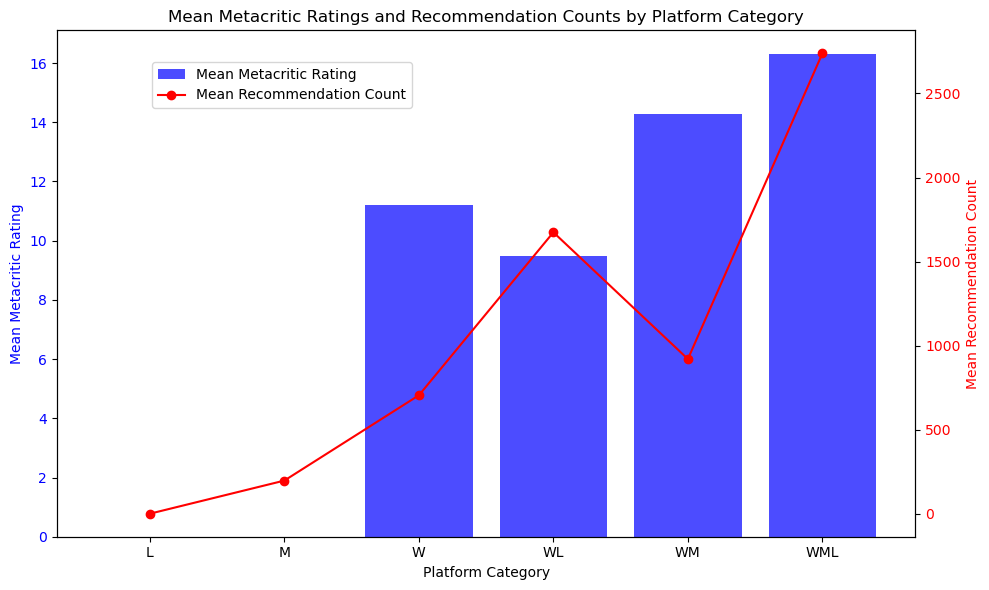

In [29]:
# Data from the platform_means DataFrame
categories = platform_means['GameCount']
mean_metacritic_ratings = platform_means['MetacriticRating']
mean_recommendation_counts = platform_means['RecommendationCount']

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mean Metacritic ratings
ax1.bar(categories, mean_metacritic_ratings, color='b', alpha=0.7, label='Mean Metacritic Rating')
ax1.set_xlabel('Platform Category')
ax1.set_ylabel('Mean Metacritic Rating', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for recommendation counts
ax2 = ax1.twinx()
ax2.plot(categories, mean_recommendation_counts, color='r', marker='o', label='Mean Recommendation Count')
ax2.set_ylabel('Mean Recommendation Count', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.9))

# Set the title and show the plot
plt.title('Mean Metacritic Ratings and Recommendation Counts by Platform Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis 

- Windows is the most dominant gaming platform, with a significantly higher number of games available compared to Mac and Linux.
- Games available on the Windows & Mac combination seem to have higher Metacritic ratings and recommendation counts, indicating a positive reception among users and critics.
- The combination of all three platforms (Windows, Mac, and Linux) results in the highest mean recommendation count, suggesting that cross-platform availability may lead to increased user engagement and recommendations.

### (5) Is there any advantage to developing a Single-Player or a multi-player game?

In [30]:
#Get average stats for games that are "Single Player"
singleplayer_df = cleaned_data_df.loc[cleaned_data_df["CategorySinglePlayer"] == True]
single_count = singleplayer_df["GameName"].count()
single_players = singleplayer_df["SteamSpyPlayersEstimate"].mean()
single_owners = singleplayer_df["SteamSpyOwners"].mean()
single_ratings = singleplayer_df["MetacriticRating"].mean()
single_recom = singleplayer_df["RecommendationCount"].mean()

#Get average stats for games that are "Multi Player"
multiplayer_df = cleaned_data_df.loc[cleaned_data_df["CategoryMultiplayer"] == True]
multi_count = multiplayer_df["GameName"].count()
multi_players = multiplayer_df["SteamSpyPlayersEstimate"].mean()
multi_owners = multiplayer_df["SteamSpyOwners"].mean()
multi_ratings = multiplayer_df["MetacriticRating"].mean()
multi_recom = multiplayer_df["RecommendationCount"].mean()

single_multi_df = pd.DataFrame({"Game Category": ["Single Player", "Multi Player"],
                                "Count": [single_count, multi_count],
                                "Owners (Thousands)": [single_owners/1000, multi_owners/1000],
                                "Players (Thousands)": [single_players/1000, multi_players/1000],
                                "Ratings": [single_ratings, multi_ratings],
                                "Recommendations (Hundreds)": [single_recom/100, multi_recom/100]})

single_multi_df.head()

,Game Category,Count,Owners (Thousands),Players (Thousands),Ratings,Recommendations (Hundreds)
0,Single Player,10772,145.056097,92.595144,13.838006,9.503439
1,Multi Player,3171,389.849698,273.088786,19.682750,29.901611


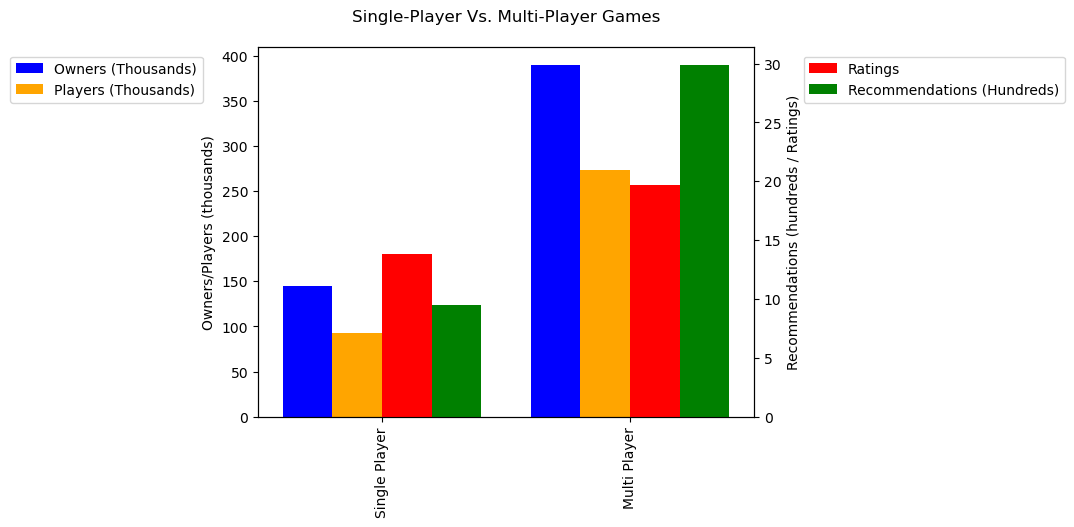

In [31]:

fig = plt.figure() # Create matplotlib figure



#tick_locations = [0.25,0.75]
#plt.xticks(tick_locations,["Single Player", "Multi Player"])

ax1 = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax1.twinx()



single_multi_df["Owners (Thousands)"].plot(kind = "bar", ax=ax1, color = "blue", position=2, width = 0.2)
single_multi_df["Players (Thousands)"].plot(kind = "bar", ax=ax1, color = "orange", position=1, width = 0.2)
single_multi_df["Ratings"].plot(kind = "bar", ax=ax2, color = 'red', width = 0.2, position = 0)
single_multi_df["Recommendations (Hundreds)"].plot(kind = "bar", ax=ax2, color = 'green', width = 0.2, position = -1)



ax1.set_ylabel("Owners/Players (thousands)")
ax2.set_ylabel("Recommendations (hundreds / Ratings)")
plt.title("Single-Player Vs. Multi-Player Games\n")
plt.xlim(-0.5,1.5)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=(-0.5, 0.85))
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc=(1.1, 0.85))


tick_locations = [0,1]
plt.xticks(tick_locations,["Single Player", "Multi Player"], rotation = 0)

#plt.tight_layout()
plt.show()

Analysis of games based on whether they are single-player or multi-player games, shows a significant advantage for multi-player games in terms of mean number of players, mean number of owners, mean Metacritic rating and mean number of recommendations on Steam.
This suggests that multi-player games tend to be more popular and successful.

### (6) Are there any apparent genre trends across the past 3 decades?

In [32]:
#load imdb-videogames.csv
imdb_games_file = "Resources/imdb-videogames.csv"
imdbgames_data = pd.read_csv(imdb_games_file)


In [33]:

#List of genres
genres_list = ["Action","Adventure","Comedy","Crime","Family","Fantasy","Mystery","Sci-Fi","Thriller"]

#Create dataframe for genre percentages per year
genre_counts_df = pd.DataFrame()

ind = 0
for i in range(1985, 2020):

    genre_counts_df.loc[ind, "Year"] = i

    #Get total count of games per year
    total_count = len(imdbgames_data[(imdbgames_data['year'] == i)])


    #For each genre
    for genre in genres_list:
        #get count of genre for the year
        count = len(imdbgames_data[(imdbgames_data[genre]==True) & (imdbgames_data['year'] == i)] )
        #set percentage of genre
        genre_counts_df.loc[ind, genre] = count*100/total_count

    ind += 1


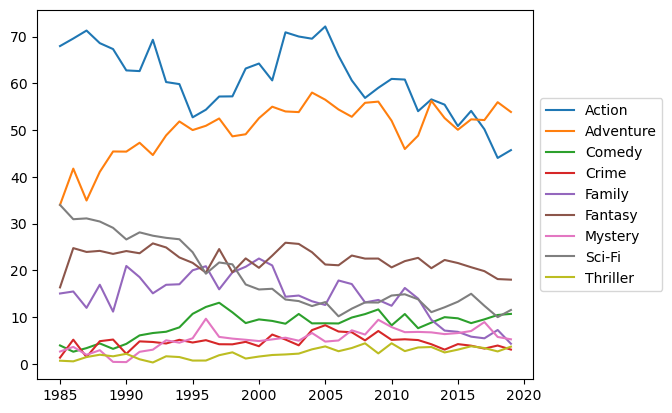

In [34]:

#Create Dataframe with genre counts
for genre in genres_list:
    plt.plot(genre_counts_df["Year"], genre_counts_df[genre], label = genre)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



In [35]:
group0 = genre_counts_df["Adventure"]
group1 = genre_counts_df["Comedy"]
group2 = genre_counts_df["Crime"]
group3 = genre_counts_df["Family"]
group4 = genre_counts_df["Fantasy"]
group5 = genre_counts_df["Mystery"]
group6 = genre_counts_df["Sci-Fi"]
group7 = genre_counts_df["Thriller"]

import scipy.stats as stats
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6 , group7)

F_onewayResult(statistic=511.4746856295056, pvalue=1.549990092515563e-152)

Analysis of the percentage of genres between 1985 and 2019, shows that while Action has been the dominant genre for decades, Adventure has been steadily rising in prominence, surpassing Action after 2015.
Also observed, is that the percentages of Family and Sci-Fi games have been decreasing, while other genres have kept relatively steady levels. It is to be noted, that this does not reflect a decrease in the number of Family or Sci-Fi games, only of their percentages relative to the total number of games per year. In fact, the number of games have been increasing per year across all genres.

### (10) Which genres do gamers prefer to play the most

In [37]:
cleaned_data_df.columns

Index(['Unnamed: 0', 'GameName', 'ReleaseDate', 'DemoCount',
       'MetacriticRating', 'RecommendationCount', 'ScreenshotCount',
       'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'PriceInitial',
       'PriceFinal', 'CategorySinglePlayer', 'CategoryMultiplayer',
       'PlatformCount', 'GameCount'],
      dtype='object')

                          Genre  Total Recommendation count
0                  GenreIsIndie                     5581224
1                 GenreIsAction                    10514761
2              GenreIsAdventure                     4243379
3                 GenreIsCasual                     1377575
4               GenreIsStrategy                     2484527
5                    GenreIsRPG                     3305264
6             GenreIsSimulation                     2042870
7            GenreIsEarlyAccess                     1527098
8             GenreIsFreeToPlay                     2931642
9                 GenreIsSports                      334677
10                GenreIsRacing                      328385
11  GenreIsMassivelyMultiplayer                     1336674


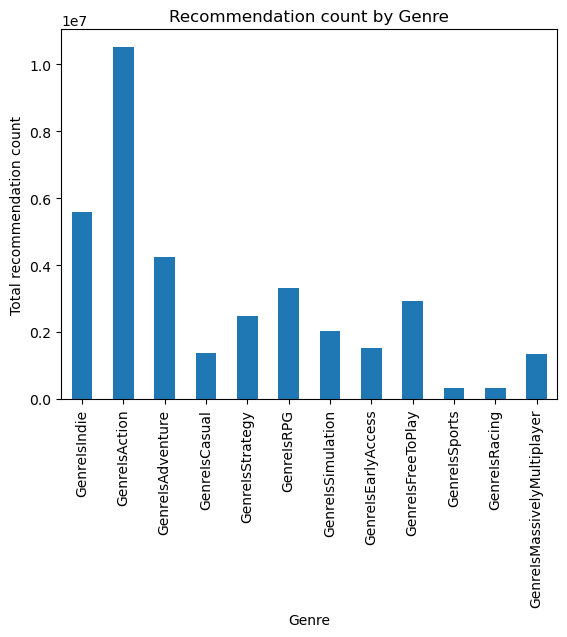

In [36]:
#Total recommendation count for each genre

genres = ['GenreIsIndie',
       'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy',
       'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess',
       'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
       'GenreIsMassivelyMultiplayer']

count_ratings = {}
for genre in genres:
    count_ratings[genre] = cleaned_data_df[cleaned_data_df[genre]]['RecommendationCount'].sum()

mean_ratings_df = pd.DataFrame(list(count_ratings.items()), columns=['Genre', 'Total Recommendation count'])
print(mean_ratings_df)

mean_ratings_df.set_index('Genre').plot(kind='bar', legend=False)
plt.ylabel('Total recommendation count')
plt.title('Recommendation count by Genre')
plt.show()

                          Genre  MetacriticRating
0                  GenreIsIndie          9.832117
1                 GenreIsAction         14.756231
2              GenreIsAdventure         13.163193
3                 GenreIsCasual          4.401506
4               GenreIsStrategy         17.195393
5                    GenreIsRPG         15.069235
6             GenreIsSimulation          9.209686
7            GenreIsEarlyAccess          0.177627
8             GenreIsFreeToPlay          7.393740
9                 GenreIsSports          9.213147
10                GenreIsRacing         14.486726
11  GenreIsMassivelyMultiplayer         10.547009


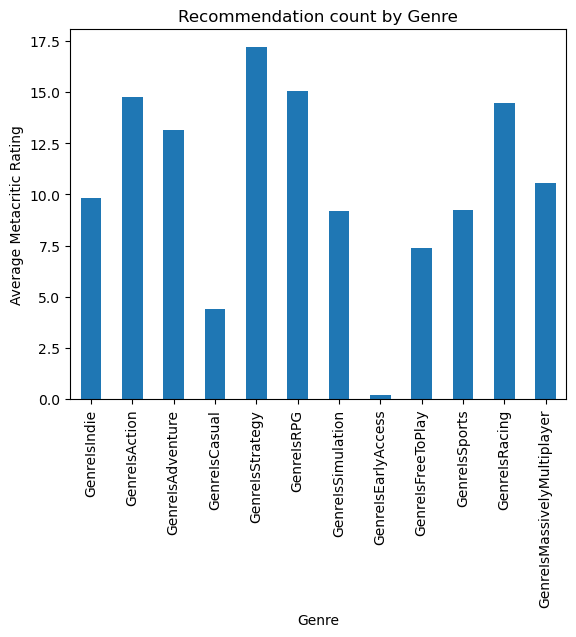

In [38]:
#Mean criticRating for each genre

genres = ['GenreIsIndie',
       'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy',
       'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess',
       'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
       'GenreIsMassivelyMultiplayer']

count_ratings = {}
for genre in genres:
    count_ratings[genre] = cleaned_data_df[cleaned_data_df[genre]]['MetacriticRating'].mean()

mean_ratings_df = pd.DataFrame(list(count_ratings.items()), columns=['Genre', 'MetacriticRating'])
print(mean_ratings_df)

mean_ratings_df.set_index('Genre').plot(kind='bar', legend=False)
plt.ylabel('Average Metacritic Rating')
plt.title('Recommendation count by Genre')
plt.show()

## Analysis

-Analysis, shows that genres action, adventure and indie has beed recommended by the players most. We can also note the genres stertergy, RPG, Action, Racing and RPG have relatively high ratings from the critics
- Worst recommended genres are sports, racing and casual and the worst critic rated genres are casual, early access and free to play
- Looking at the data we can see action genre has overlap in best recomendations and crtics rating 
- Looking at the data we can see casual genre has  overlap in worst recommendation and critic rating

### (11) Which genres do players choose to spend the most money ?

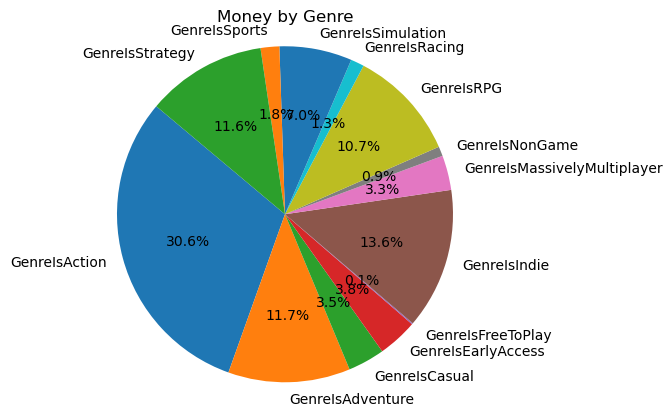

In [41]:
#The total money made by each genre by selling the games

df_melted = cleaned_data_df.melt(id_vars=['PriceInitial', 'SteamSpyOwners'], 
                    value_vars=['GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer'],
                    var_name='genre', value_name='true_value')

# Filter by true_value
df_melted = df_melted[df_melted['true_value']]

# Group by genre and calculate the mean initial price and sum number of owners
grouped = df_melted.groupby('genre').agg({'PriceInitial': 'mean', 'SteamSpyOwners': 'sum'}).reset_index()

# Calculate total money for each genre
grouped['total_money'] = grouped['PriceInitial'] * grouped['SteamSpyOwners']

# Plotting
labels = grouped['genre']
sizes = grouped['total_money']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Money by Genre")
plt.axis('equal')
plt.show()

## Analysis

-Analysis shows the genres action has the most capital. This genre has the most number of owners with the highest game prices. Followed by adventure and stratergy genre. Racing genre and sports genre has the least amount of capital in it 
- Analysis shows genres with least capital are casual, sports, early access, free to play and racing 
- Also these genres of games fall in both the catergory of worst rated and recommended

 ### (12) Which genres has the changes in demand and discounts ?

In [49]:
#sort the data frame by year    

sort_by_year_df = cleaned_data_df.sort_values(by=['ReleaseDate'])
sort_by_year_df.head()

,Unnamed: 0,GameName,ReleaseDate,DemoCount,MetacriticRating,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,ControllerSupport,...,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,CategorySinglePlayer,CategoryMultiplayer,PlatformCount,GameCount,price_difference
3095,3312,Carmageddon Max Pack,1997-06-30,0,0,241,7,74609,27082,False,...,False,True,False,9.99,9.99,True,True,1,W,0.0
6,6,Half-Life,1998-11-08,0,96,12486,11,5927504,2268772,False,...,False,False,False,9.99,9.99,True,True,3,WML,0.0
1,1,Team Fortress Classic,1999-04-01,0,0,2439,5,5399140,753627,False,...,False,False,False,4.99,4.99,False,True,3,WML,0.0
4,4,Half-Life: Opposing Force,1999-11-01,0,0,2934,5,5399499,705741,False,...,False,False,False,4.99,4.99,True,True,3,WML,0.0
5,5,Ricochet,2000-11-01,0,0,1965,4,7488563,843481,False,...,False,False,False,4.99,4.99,False,True,3,WML,0.0


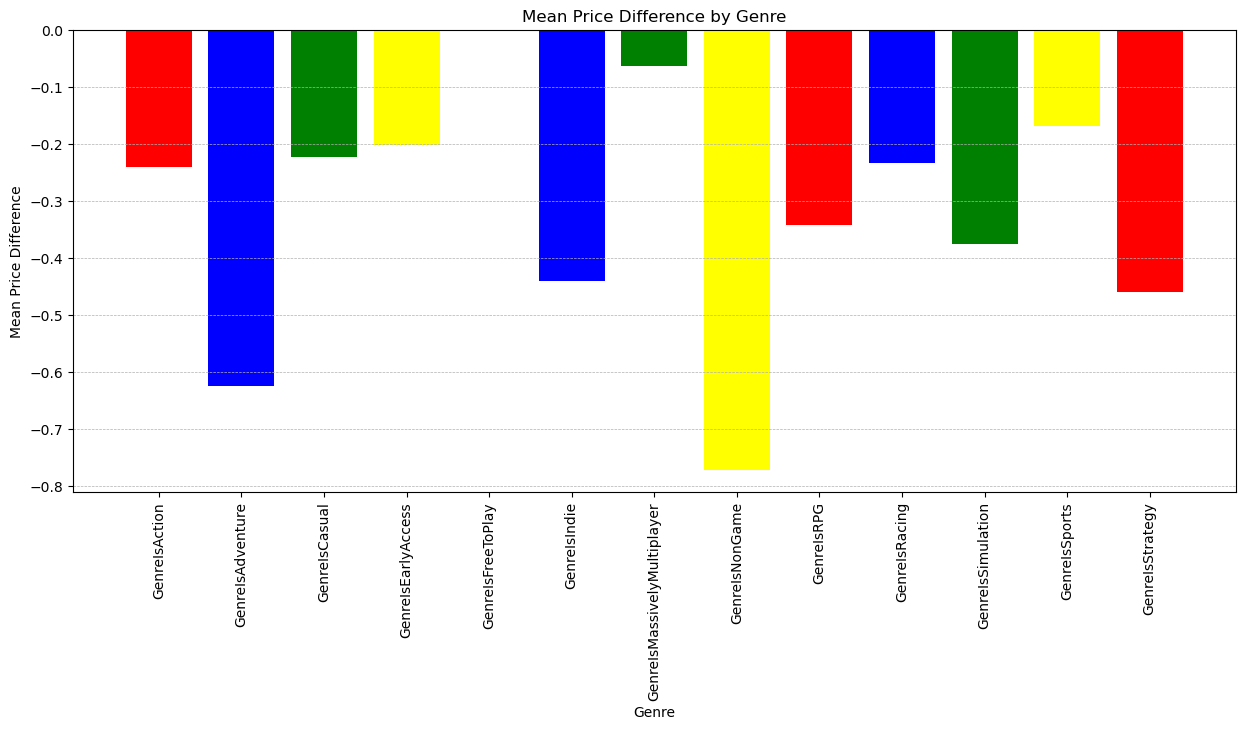

In [65]:
#Find the difference in mean final price and initial price for each game genre

sort_by_year_df['price_difference'] = sort_by_year_df['PriceFinal'] - sort_by_year_df['PriceInitial']

# Melt dataframe for genre columns
df_melted = sort_by_year_df.melt(id_vars=['price_difference'], 
                    value_vars=['GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer'],
                    var_name='genre', value_name='is_genre')

# Filter by is_genre and then group by genre to find mean difference
grouped = df_melted[df_melted['is_genre']].groupby('genre').agg({'price_difference': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(15,6))
plt.bar(grouped['genre'], grouped['price_difference'], color=['red', 'blue', 'green', 'yellow'])
plt.title('Mean Price Difference by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Price Difference')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

## Analysis

-Genres with increase in demand. If the price is increase by the platform, we can assume the genre has a higher demand. Across all the genres we can see the mean price has reduced. But we can analyse by the rate of change 
- We can see genres indie, nongame and adventure has the greatest negative mean price difference. They experience the greatest decline in demand over time and steam would most likely list these genres on discount 
- We can see genres multiplayer, action, racing and sports has the least mean price difference. They hold the demand value over time and arent as subjected to discounting 